In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
data = pd.read_csv('dataset/main.csv')

# Split the data into features and target
X = data[['day', 'hour', 'trip_duration', 'trip_distance']]
y = data['total_amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
# Building the neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)


c:\Users\giris\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
59293/59293 ━━━━━━━━━━━━━━━━━━━━ 51s 849us/step - loss: 40435.8008 - val_loss: 204.7631
Epoch 2/50
59293/59293 ━━━━━━━━━━━━━━━━━━━━ 64s 1ms/step - loss: 391.2541 - val_loss: 199.6441
Epoch 3/50
59293/59293 ━━━━━━━━━━━━━━━━━━━━ 38s 643us/step - loss: 477.9345 - val_loss: 14770.9053
Epoch 4/50
59293/59293 ━━━━━━━━━━━━━━━━━━━━ 73s 1ms/step - loss: 462.6198 - val_loss: 16316.4043
Epoch 5/50
59293/59293 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - loss: 443.7365 - val_loss: 695.3950
Epoch 6/50
59293/59293 ━━━━━━━━━━━━━━━━━━━━ 37s 618us/step - loss: 767.8494 - val_loss: 899.7094
Epoch 7/50
59293/59293 ━━━━━━━━━━━━━━━━━━━━ 41s 697us/step - loss: 472.4612 - val_loss: 275.2466
Epoch 8/50
59293/59293 ━━━━━━━━━━━━━━━━━━━━ 42s 710us/step - loss: 624.3921 - val_loss: 17935.6992
Epoch 9/50
59293/59293 ━━━━━━━━━━━━━━━━━━━━ 42s 700us/step - loss: 641.7454 - val_loss: 8665.0469
Epoch 10/50
59293/59293 ━━━━━━━━━━━━━━━━━━━━ 42s 702us/step - loss: 494.6072 - val_loss: 9064.8232
Epoch 11/50
59293/59293 ━

18529/18529 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 198.3186
Test Loss: 211.2683563232422
18529/18529 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step
Mean Squared Error (MSE): 211.2647377529557
Root Mean Squared Error (RMSE): 14.534948839020924
Mean Absolute Error (MAE): 5.592549324632304


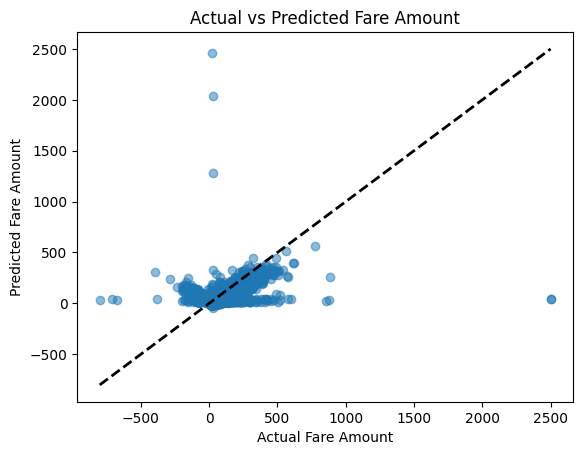

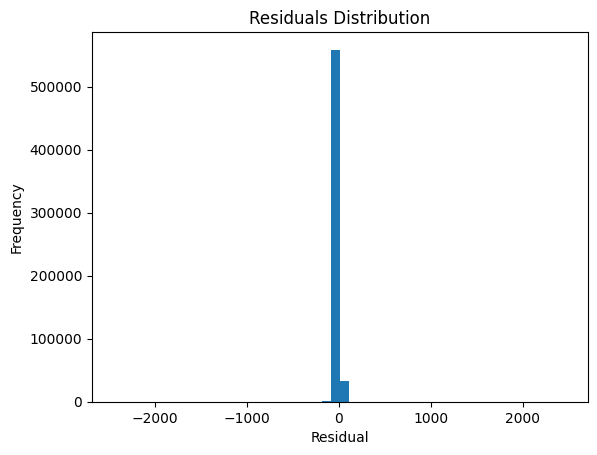

In [4]:
# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

# Plotting predicted vs actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.title('Actual vs Predicted Fare Amount')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# Plotting residuals
residuals = y_test - y_pred.flatten()
plt.hist(residuals, bins=50)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()
